In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist

# Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Summarize loaded dataset

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


# Plot first few images

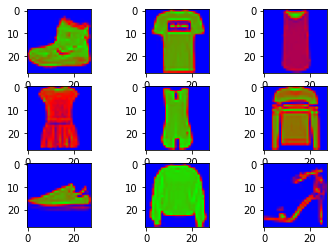

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('brg'))
 
# show the figure
plt.show()

In [ ]:
X_train = X_train/255
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_train_flatten.shape

(60000, 784)

In [ ]:
X_test = X_test/255
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Load Sequential model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5992 - accuracy: 0.7983
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8429
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4363 - accuracy: 0.8503
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4213 - accuracy: 0.8545
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4123 - accuracy: 0.8589


In [ ]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.8409


[0.46352675557136536, 0.8409000039100647]

In [ ]:
y_predict = model.predict(X_test_flatten)
y_predict

313/313 [==============================] - 1s 1ms/step


array([[5.57835447e-04, 3.89816967e-04, 1.95140466e-02, ...,
        9.83333647e-01, 7.66071498e-01, 9.98454571e-01],
       [2.20433529e-02, 1.17260672e-04, 9.79593754e-01, ...,
        3.58609472e-18, 1.36066950e-03, 6.06378879e-13],
       [8.18126202e-01, 9.99997377e-01, 5.09888053e-01, ...,
        6.56461225e-07, 1.09933382e-02, 7.60931130e-07],
       ...,
       [7.71784961e-01, 8.26751872e-04, 1.09274395e-01, ...,
        1.02271361e-03, 9.62722719e-01, 1.61353637e-05],
       [1.69491842e-01, 9.99993801e-01, 1.93611458e-01, ...,
        4.52032145e-05, 5.87663520e-03, 6.18965458e-03],
       [7.20711611e-03, 1.19483806e-02, 1.27098128e-01, ...,
        8.16681206e-01, 6.03372395e-01, 1.82323515e-01]], dtype=float32)

# Categories of images

In [ ]:
l = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]  

In [ ]:
x = np.argmax(y_predict[3])
x

1

In [ ]:
l[x]

'Trouser'

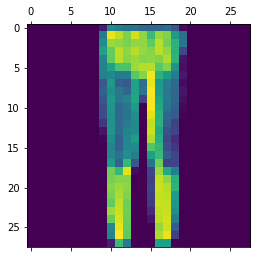

In [ ]:
plt.matshow(X_test[3])